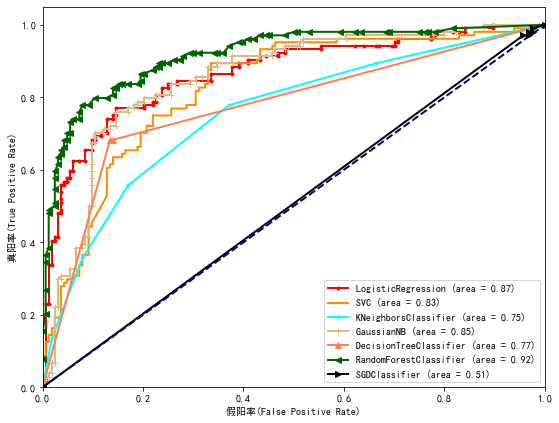

In [2]:
#ROC曲线绘制
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import cycle
from sklearn import svm, datasets,preprocessing
from sklearn.metrics import roc_curve, auc  #计算roc和auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.multiclass import OneVsRestClassifier

titanic_df=pd.read_csv('../data/tatnic_processed.csv')

plt.rcParams['font.sans-serif']=['SimHei']    #指定默认字体正确显示中文
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号


#选取参与训练和预测的特征与目标
features = titanic_df[['Pclass', 'Age', 'FamilySize', 'Fare', 'Cabin_cat', 'Sex_female', 'Sex_male', 'Embarked_cat']]
target = titanic_df['Survived']

#分离数据集
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=33)

MLA = [
    LogisticRegression(solver="liblinear"),
    svm.SVC(probability=True,gamma="auto"),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    SGDClassifier(loss = "log",max_iter=100,random_state=0)
      ]

lw = 2
plt.rcParams['figure.figsize'] = (9.0, 7.0)
colorlist = cycle(['red', 'darkorange','aqua','burlywood','coral','darkgreen','black'])
typelist = cycle(['.',',','1','+','^','<','>'])
for alg, color,style in zip(MLA, colorlist,typelist):
    classifier = OneVsRestClassifier(alg)
    classifier.fit(x_train, y_train)
    y_proba = classifier.predict_proba(x_test)
    fpr = {}
    tpr = {}
    roc_auc = {}
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color,marker=style,
         lw=lw, label='{0} (area = {1:0.2f})'
             ''.format(alg.__class__.__name__, roc_auc)) #假正率为横坐标，真正率为纵坐标做曲线

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳率(False Positive Rate)')
plt.ylabel('真阳率(True Positive Rate)')
plt.legend(loc="lower right")
plt.show()
